In [42]:
# Pymaceuticals Inc.
#---

### Analysis

# - Capomulin had the most test number of observed timepoints (i.e. 230 mice) compared to the other 9 drugs tested
# - Of the four drugs - Capomulin, Ramicane, Infubinol and Ceftamin - Capomulin and Ramicane were the best performing, having
#   lower final tumour volume than the other two drugs - Infubinol and Ceftamin. The boxplots suggest that Ramicane is the
#   most effective treatment, as it has the lowest median final tumour volume. 
# - The correlation (Pearson correlation coefficient) between mouse weight and the average tumor volume is 0.84, which suggests
#   that there is a strong positive correlation between the two variables. That is, as mouse weight increases, average
#   tumor volume will also increase.

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

In [3]:
# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_study_df = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
combined_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.
mice_number=len(combined_study_df["Mouse ID"].unique())
mice_number

249

In [35]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicates = combined_study_df[combined_study_df.duplicated(subset=["Mouse ID","Timepoint"])]
duplicates["Mouse ID"].unique()

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_g989 = combined_study_df.loc[combined_study_df["Mouse ID"] == "g989",:]
mouse_g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_study_df = combined_study_df.drop(combined_study_df[(combined_study_df["Mouse ID"] == "g989")].index)
clean_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_mice = len(clean_study_df["Mouse ID"].unique())
clean_mice

248

In [9]:
## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

Drug_group = clean_study_df.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_volume = Drug_group["Tumor Volume (mm3)"].mean()
median_tumor_volume = Drug_group["Tumor Volume (mm3)"].median()
variance_tumor_volume = Drug_group["Tumor Volume (mm3)"].var()
SD_tumor_volume = Drug_group["Tumor Volume (mm3)"].std()
sem_tumor_volume = Drug_group["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.

Drug_group_summary = pd.DataFrame({"Mean Tumor Volume": mean_tumor_volume,
                      "Median Tumor Volume":median_tumor_volume,
                    "Tumor Volume Variance" : variance_tumor_volume,
                                  "Tumor Volume Std. Dev." :SD_tumor_volume,
                                  "Tumor Volume Std. Err.":sem_tumor_volume})
Drug_group_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
## Bar and Pie Charts

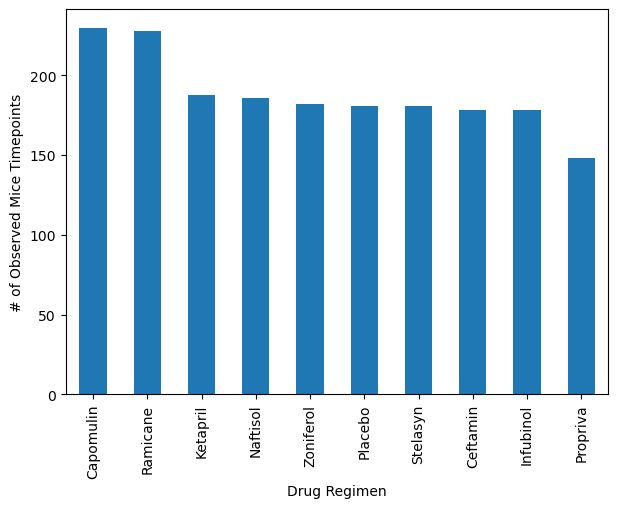

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# calculate the count of mice timepoint for each drug

Count_timepoint = Drug_group["Timepoint"].count()

# create a DataFrame to store the count per drug

Timepoint_per_drug= pd.DataFrame({"Observed Mice Timepoints": Count_timepoint})
Timepoint_per_drug = Timepoint_per_drug.sort_values("Observed Mice Timepoints",ascending=False) 

# Use DataFrame.plot() in order to create a bar chart of the data
Timepoint_per_drug.plot(kind="bar", figsize=(7,5), legend = False)   

# set a label for x and y axis
plt.xlabel("Drug Regimen") 
plt.ylabel("# of Observed Mice Timepoints") 
plt.show()

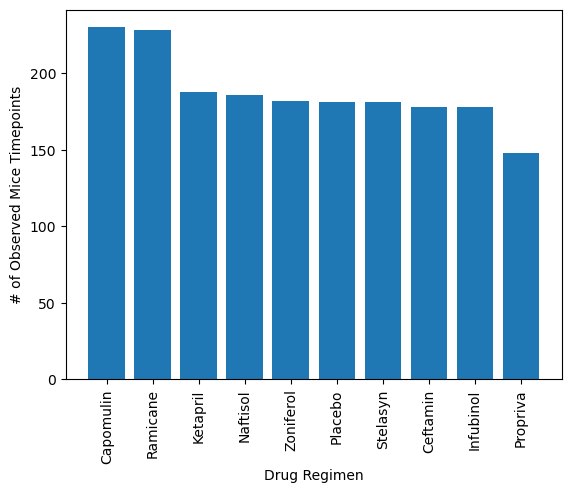

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# sort the data series created above by descending order
Count_timepoint = Count_timepoint.sort_values(ascending=False)

# Set x axis and tick locations using the data series created above
x_axis = Count_timepoint.index.values
y_axis = Count_timepoint.values

#Create a Pyplot bar plot based on the x and y axis defined above
plt.bar(x_axis, y_axis, align='center')

# set a label for x and y axis
plt.xlabel("Drug Regimen") 
plt.ylabel("# of Observed Mice Timepoints") 
plt.xticks(rotation="vertical")

plt.show()


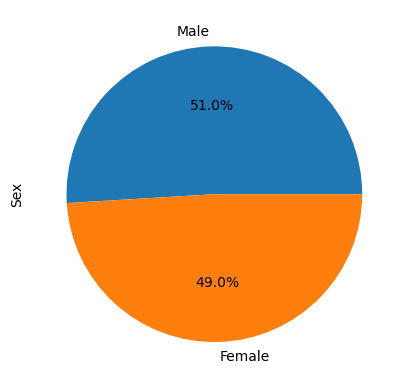

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# create a data series for distribution of female and male mice in the study
sex_dist = clean_study_df["Sex"].value_counts()

# plot the pie graph 
sex_dist.plot(kind= "pie" ,autopct= "%1.1f%%")
plt.show()


In [15]:
#Obtain the number count for male and female mice
sex_dist

Male      958
Female    922
Name: Sex, dtype: int64

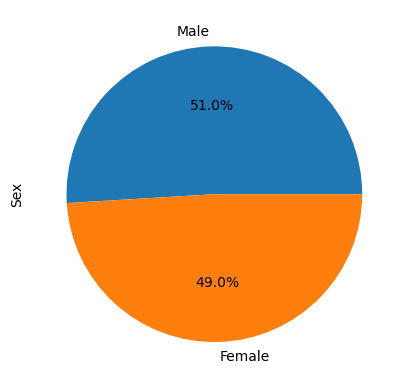

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# label each section of the pie chart
labels = ['Male', 'Female']

# assign a size to each value
sizes = [958, 922]

# plot the pie graph
plt.pie(sizes, labels=labels, autopct="%1.1f%%") 
plt.ylabel('Sex')
plt.show()


In [17]:
## Quartiles, Outliers and Boxplots

In [30]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Mouse_group = clean_study_df.groupby(["Mouse ID"])
Max_time_per_mouse = Mouse_group[["Timepoint"]].max().reset_index()
#Max_time_per_mouse 
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
combined_max_study = pd.merge(clean_study_df,Max_time_per_mouse, how='right', on=['Mouse ID','Timepoint'])

In [33]:
# Put treatments into a list for for loop (and later for plot labels)
Drugs_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
Drugs_list_df = combined_max_study[combined_max_study["Drug Regimen"].isin(Drugs_list)]

# Create empty list to fill with tumor vol data (for plotting)
Tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in Drugs_list:

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    Tumors_series = Drugs_list_df.loc[(Drugs_list_df["Drug Regimen"] == drug)]["Tumor Volume (mm3)"]

    
    # add subset 
    Tumor_vol.append(Tumors_series)

    
    # Determine outliers using upper and lower bounds
    Q1 = Tumors_series.quantile(q=0.25)
    Q3 = Tumors_series.quantile(q=0.75)
    IQR = Q3 - Q1
    upperbound = Q3 + (1.5 * IQR)
    lowerbound = Q1 - (1.5 * IQR)
    outliers = Tumors_series.loc[(Tumors_series<lowerbound)|(Tumors_series>upperbound)]
    print(drug, outliers)

Capomulin Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


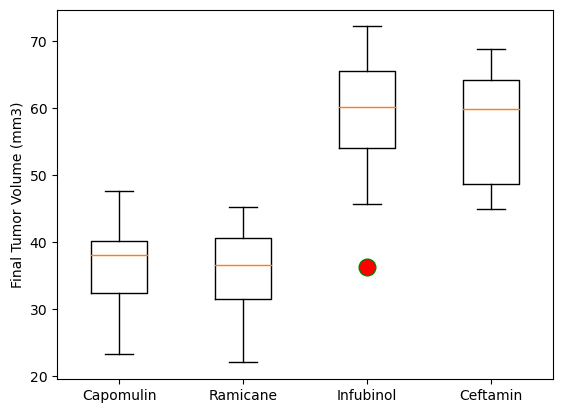

In [41]:
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='g')

plt.boxplot(Tumor_vol, labels=Drugs_list, flierprops=flierprops)
plt.ylabel('Final Tumor Volume (mm3)')

plt.show()

In [21]:
## Line and Scatter Plots

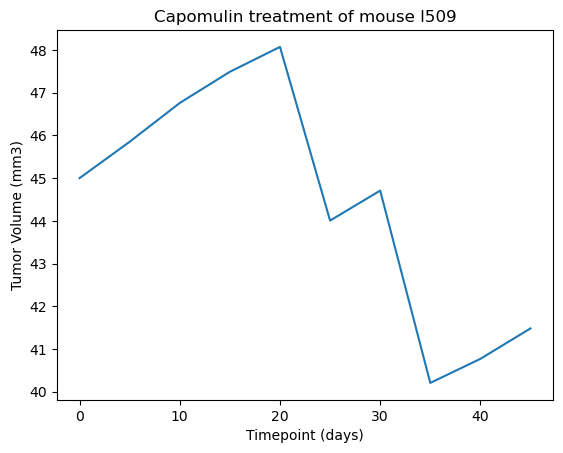

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


In [27]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_df_l509 = clean_study_df.loc[(clean_study_df["Drug Regimen"] == "Capomulin") & 
                                       (clean_study_df["Mouse ID"] == "l509"),:]

#Capomulin_df_l509 = Capomulin_df_l509[["Timepoint","Tumor Volume (mm3)"]]

#set the x and y values, x and y axis, and chart title 
x_values_time = Capomulin_df_l509["Timepoint"]
y_values_time = Capomulin_df_l509["Tumor Volume (mm3)"] 
plt.plot(x_values_time,y_values_time) 
plt.xlabel('Timepoint (days)') 
plt.ylabel('Tumor Volume (mm3)') 
plt.title('Capomulin treatment of mouse l509')
plt.show()

C:\Users\Evie Chanthy\AppData\Local\Temp\ipykernel_6704\3145298191.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Capomulin_df_avg = Capomulin_df.groupby(["Mouse ID"]).mean()


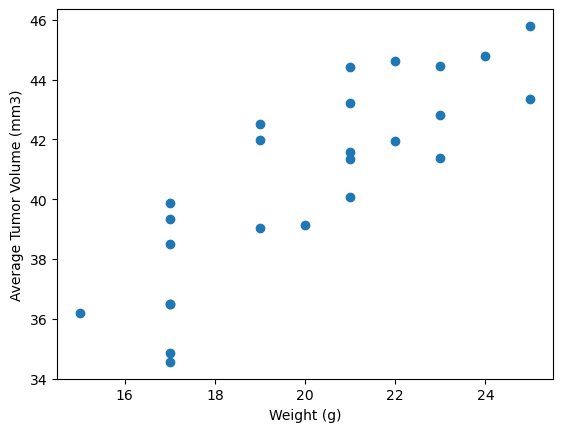

In [28]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# create a new dataframe for Capomulin data, groupedby Mouse ID, and obtaining the mean of each column per Mouse ID
Capomulin_df = clean_study_df.loc[clean_study_df["Drug Regimen"] == "Capomulin",:]
Capomulin_df_avg = Capomulin_df.groupby(["Mouse ID"]).mean()


#set the x and y values, x and y axis, and chart title 
x_values_avg = Capomulin_df_avg["Weight (g)"]
y_values_avg = Capomulin_df_avg["Tumor Volume (mm3)"]
plt.scatter(x_values_avg,y_values_avg) 
plt.xlabel('Weight (g)') 
plt.ylabel('Average Tumor Volume (mm3)') 
plt.show()


In [ ]:
## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


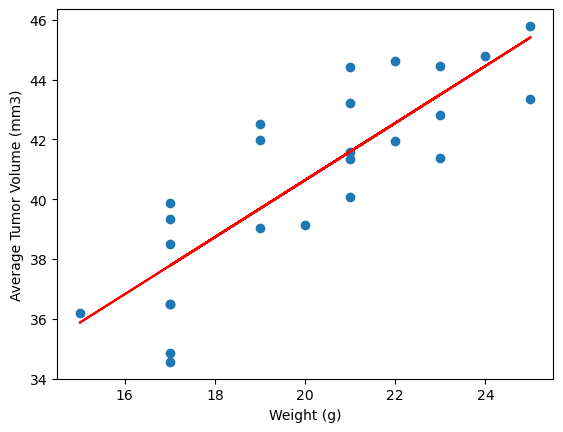

In [29]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#calculate the correlation coefficient and print it out
correlation = st.pearsonr(x_values_avg, y_values_avg) 
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}") 

# -	Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_avg, y_values_avg) 
regress_values = x_values_avg * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_avg, y_values_avg)
plt.plot(x_values_avg,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)') 
plt.ylabel('Average Tumor Volume (mm3)') 
plt.show()
